# 건강영양조사로 심장병(심근경색, 협심증) 예측 모델 제작

- 202055131 서영주, 202055151 진희정

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.api as sm

# 소수점 3자리까지 표시
%precision 3


'%.3f'

In [2]:
data1 = pd.read_excel('hn18_all.xlsx')
data2 = pd.read_excel('hn17_all.xlsx')
data3 = pd.read_excel('hn16_all.xlsx')
data4 = pd.read_excel('hn15_all.xlsx')

data5 = pd.read_excel('hn11_all.xlsx')
data6 = pd.read_excel('hn12_all.xlsx')
data7 = pd.read_excel('hn13_all.xlsx')
data8 = pd.read_excel('hn14_all.xlsx')

In [3]:
#데이터 합치기
data = pd.concat([data1,data2,data3,data4])

In [4]:
# 심근경색 또는 협심증 유병여부가 나와있는 사람만 선정
d_data = data[(data['DI4_pr'] == 0) | (data['DI4_pr'] == 1)]
d_data

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,LF_S10,LF_S11,LF_S12,LF_S13,LF_S14,LF_S14_1,LF_S15,LF_S16,LF_SECUR,LF_SECUR_G
13,2020.09.01.,A901024801,A9010248,2018,1,1,2,A901,1,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,2020.09.01.,A902024002,A9020240,2018,1,1,1,A902,2,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,2020.09.01.,A902036402,A9020364,2018,1,1,1,A902,2,56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,2020.09.01.,A902038701,A9020387,2018,1,1,1,A902,1,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,2020.09.01.,A903021601,A9030216,2018,1,1,2,A903,2,72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7057,2020.08.31.,O293670316,O2936703,2015,15,1,1,O293,2,76,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0,3.0
7083,2020.08.31.,O293759016,O2937590,2015,15,1,1,O293,1,70,...,3.0,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
7187,2020.08.31.,O296692515,O2966925,2015,15,1,1,O296,2,55,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
7350,2020.08.31.,P295765116,P2957651,2015,16,1,1,P295,1,64,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0


In [5]:
# 흡연여부를 예:1 아니오:0으로 열 추가
d_data['smoking'] = [1 if (b == 1)|(b == 2) else 0 for b in d_data['BS1_1']]
d_data

<ipython-input-5-4cd30ae61f7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_data['smoking'] = [1 if (b == 1)|(b == 2) else 0 for b in d_data['BS1_1']]


,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,LF_S11,LF_S12,LF_S13,LF_S14,LF_S14_1,LF_S15,LF_S16,LF_SECUR,LF_SECUR_G,smoking
13,2020.09.01.,A901024801,A9010248,2018,1,1,2,A901,1,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
45,2020.09.01.,A902024002,A9020240,2018,1,1,1,A902,2,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
64,2020.09.01.,A902036402,A9020364,2018,1,1,1,A902,2,56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
70,2020.09.01.,A902038701,A9020387,2018,1,1,1,A902,1,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
79,2020.09.01.,A903021601,A9030216,2018,1,1,2,A903,2,72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7057,2020.08.31.,O293670316,O2936703,2015,15,1,1,O293,2,76,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0,3.0,1
7083,2020.08.31.,O293759016,O2937590,2015,15,1,1,O293,1,70,...,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0,1
7187,2020.08.31.,O296692515,O2966925,2015,15,1,1,O296,2,55,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0,0
7350,2020.08.31.,P295765116,P2957651,2015,16,1,1,P295,1,64,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0,1


In [6]:
# 근력운동 비해당, 무응답 열 제거 - 일주일 동안의 운동횟수 0회-1, 1회-2, 2회-3, 3회-4, 4회-5, 5회이상-6
d_data2 = d_data.drop(d_data[(d_data['BE5_1'] == 8) | (d_data['BE5_1'] == 9)].index)
d_data2

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,LF_S11,LF_S12,LF_S13,LF_S14,LF_S14_1,LF_S15,LF_S16,LF_SECUR,LF_SECUR_G,smoking
13,2020.09.01.,A901024801,A9010248,2018,1,1,2,A901,1,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
45,2020.09.01.,A902024002,A9020240,2018,1,1,1,A902,2,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
64,2020.09.01.,A902036402,A9020364,2018,1,1,1,A902,2,56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
70,2020.09.01.,A902038701,A9020387,2018,1,1,1,A902,1,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
79,2020.09.01.,A903021601,A9030216,2018,1,1,2,A903,2,72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7057,2020.08.31.,O293670316,O2936703,2015,15,1,1,O293,2,76,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0,3.0,1
7083,2020.08.31.,O293759016,O2937590,2015,15,1,1,O293,1,70,...,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0,1
7187,2020.08.31.,O296692515,O2966925,2015,15,1,1,O296,2,55,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0,0
7350,2020.08.31.,P295765116,P2957651,2015,16,1,1,P295,1,64,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0,1


#### 1)가설 및 목적
가설 : 조사한 심장병 위험요인들이 수치가 높을수록 심장병에 걸릴 확률이 높아질 것이다.\
목적 : 심장병에 걸릴 확률을 낮추어 심장병을 예방하기 위해 모델을 제작했다.

#### 2)데이터의 핵심내용
심장병의 위험요인들만 추출함
출처 - https://www.capitalcardiology.com/patient-education/cardiac-risk-factors/?lang=ko

- age : 나이
- sex : 남자-1, 여자-2
- HE_sbp : 혈압
- HE_glu : 공복혈당
- HE_chol : 총콜레스테롤
- DI4_pr : 심근경색증 또는 협심증 현재 유병여부 (0:없음, 1:있음)
- BS1_1 : 평생 흡연여부 (예:1 아니오:0)
- HE_wt : 체중
- HE_BMI : 체질량 지수
- N_NA : 나트륨섭취량(mg)

In [7]:
#필요한 열만 추출 
d_data2_1 = d_data2.loc[:,['age','sex','HE_sbp','HE_glu','HE_chol','smoking','HE_wt','HE_BMI','N_NA','BE5_1','DI4_pr']]
d_data2_1

,age,sex,HE_sbp,HE_glu,HE_chol,smoking,HE_wt,HE_BMI,N_NA,BE5_1,DI4_pr
13,57,1,116.0,99.0,211.0,1,94.1,30.002158,9921.098795,1.0,1.0
45,74,2,126.0,96.0,145.0,0,63.0,24.826128,4017.041461,1.0,1.0
64,56,2,124.0,106.0,140.0,0,57.6,20.481245,5497.114372,1.0,1.0
70,74,1,122.0,142.0,123.0,1,57.4,21.237738,854.513004,5.0,1.0
79,72,2,129.0,112.0,148.0,0,64.2,25.782263,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7057,76,2,102.0,147.0,209.0,1,68.2,26.707352,1134.120801,1.0,1.0
7083,70,1,144.0,111.0,137.0,1,72.2,27.819295,4062.300131,6.0,1.0
7187,55,2,118.0,NaN,NaN,0,63.1,26.571990,4586.644849,1.0,1.0
7350,64,1,116.0,148.0,215.0,1,72.9,26.108062,2415.187373,3.0,0.0


In [8]:
d_data3 = d_data2_1.dropna() #NAN값 포함된 행 제거
d_data3

,age,sex,HE_sbp,HE_glu,HE_chol,smoking,HE_wt,HE_BMI,N_NA,BE5_1,DI4_pr
13,57,1,116.0,99.0,211.0,1,94.1,30.002158,9921.098795,1.0,1.0
45,74,2,126.0,96.0,145.0,0,63.0,24.826128,4017.041461,1.0,1.0
64,56,2,124.0,106.0,140.0,0,57.6,20.481245,5497.114372,1.0,1.0
70,74,1,122.0,142.0,123.0,1,57.4,21.237738,854.513004,5.0,1.0
141,57,1,141.0,92.0,153.0,1,67.4,24.138318,5343.076750,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7035,74,2,130.0,81.0,176.0,0,55.1,21.740297,1637.604784,1.0,1.0
7057,76,2,102.0,147.0,209.0,1,68.2,26.707352,1134.120801,1.0,1.0
7083,70,1,144.0,111.0,137.0,1,72.2,27.819295,4062.300131,6.0,1.0
7350,64,1,116.0,148.0,215.0,1,72.9,26.108062,2415.187373,3.0,0.0


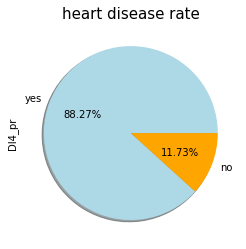

In [9]:
plt.figure(figsize = (4,4))
plt.title('heart disease rate', fontsize = 15 )
d_data3['DI4_pr'].value_counts().plot.pie(autopct = '%1.2f%%',
                                         labels = ['yes','no'],
                                         colors = ['lightblue','orange'],shadow = True)

In [10]:
#심장병 여부 비율을 1:1 로 맞춰주기 위해 심장병에 걸리지 않은 사람 행 복제
d_data3_p = d_data3[d_data3['DI4_pr'] == 0] 
d_data3_p

,age,sex,HE_sbp,HE_glu,HE_chol,smoking,HE_wt,HE_BMI,N_NA,BE5_1,DI4_pr
328,74,2,146.0,108.0,137.0,0,63.0,26.020843,885.231652,1.0,0.0
397,70,1,105.0,213.0,136.0,0,67.3,25.237289,1306.808817,1.0,0.0
1693,68,2,103.0,80.0,177.0,0,55.2,23.642444,3611.165442,1.0,0.0
1827,60,1,128.0,98.0,281.0,1,67.2,23.894786,5148.960486,6.0,0.0
1841,67,2,108.0,93.0,162.0,0,65.1,25.718204,1748.462883,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6126,69,2,150.0,98.0,232.0,0,52.9,21.709502,2602.255799,1.0,0.0
6468,60,1,139.0,131.0,177.0,1,72.5,25.204977,2476.318717,1.0,0.0
6522,68,2,142.0,99.0,249.0,0,58.6,25.837332,9659.199056,1.0,0.0
6526,75,1,134.0,93.0,154.0,0,63.7,22.731523,6616.930493,1.0,0.0


In [11]:
d_data3 = pd.concat([d_data3 , d_data3_p, d_data3_p, d_data3_p, d_data3_p, d_data3_p, d_data3_p])
d_data3

,age,sex,HE_sbp,HE_glu,HE_chol,smoking,HE_wt,HE_BMI,N_NA,BE5_1,DI4_pr
13,57,1,116.0,99.0,211.0,1,94.1,30.002158,9921.098795,1.0,1.0
45,74,2,126.0,96.0,145.0,0,63.0,24.826128,4017.041461,1.0,1.0
64,56,2,124.0,106.0,140.0,0,57.6,20.481245,5497.114372,1.0,1.0
70,74,1,122.0,142.0,123.0,1,57.4,21.237738,854.513004,5.0,1.0
141,57,1,141.0,92.0,153.0,1,67.4,24.138318,5343.076750,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6126,69,2,150.0,98.0,232.0,0,52.9,21.709502,2602.255799,1.0,0.0
6468,60,1,139.0,131.0,177.0,1,72.5,25.204977,2476.318717,1.0,0.0
6522,68,2,142.0,99.0,249.0,0,58.6,25.837332,9659.199056,1.0,0.0
6526,75,1,134.0,93.0,154.0,0,63.7,22.731523,6616.930493,1.0,0.0


In [12]:
d_data3.describe() #coulumn별 통계

,age,sex,HE_sbp,HE_glu,HE_chol,smoking,HE_wt,HE_BMI,N_NA,BE5_1,DI4_pr
count,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,68.368962,1.507708,128.523124,110.126413,176.574512,0.438849,62.498356,24.531451,2999.636816,1.628983,0.517986
std,9.196894,0.500198,18.211512,31.187925,40.847980,0.496502,10.156332,3.209653,1919.338886,1.507547,0.499933
min,25.000000,1.000000,82.000000,68.000000,83.000000,0.000000,35.000000,16.325476,26.096000,1.000000,0.000000
25%,63.000000,1.000000,114.000000,93.000000,144.000000,0.000000,54.900000,22.418695,1711.819072,1.000000,0.000000
50%,70.000000,2.000000,128.000000,101.000000,174.000000,0.000000,61.700000,24.438886,2583.867049,1.000000,1.000000
75%,75.000000,2.000000,141.000000,114.000000,203.000000,1.000000,69.000000,26.316651,3774.007667,1.000000,1.000000
max,80.000000,2.000000,217.000000,302.000000,292.000000,1.000000,102.800000,41.493843,15648.640289,6.000000,1.000000


In [13]:
d_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 13 to 7350
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      973 non-null    int64  
 1   sex      973 non-null    int64  
 2   HE_sbp   973 non-null    float64
 3   HE_glu   973 non-null    float64
 4   HE_chol  973 non-null    float64
 5   smoking  973 non-null    int64  
 6   HE_wt    973 non-null    float64
 7   HE_BMI   973 non-null    float64
 8   N_NA     973 non-null    float64
 9   BE5_1    973 non-null    float64
 10  DI4_pr   973 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 91.2 KB


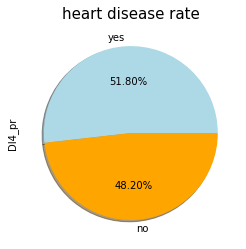

In [14]:
# 심장병 유병여부 비율 - 인위적으로 수정한 비율
plt.figure(figsize = (4,4))
plt.title('heart disease rate', fontsize = 15 )
d_data3['DI4_pr'].value_counts().plot.pie(autopct = '%1.2f%%',
                                         labels = ['yes','no'],
                                         colors = ['lightblue','orange'],shadow = True)

<ipython-input-15-23570670c5a1>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  g = d_data3.hist(ax = ax)


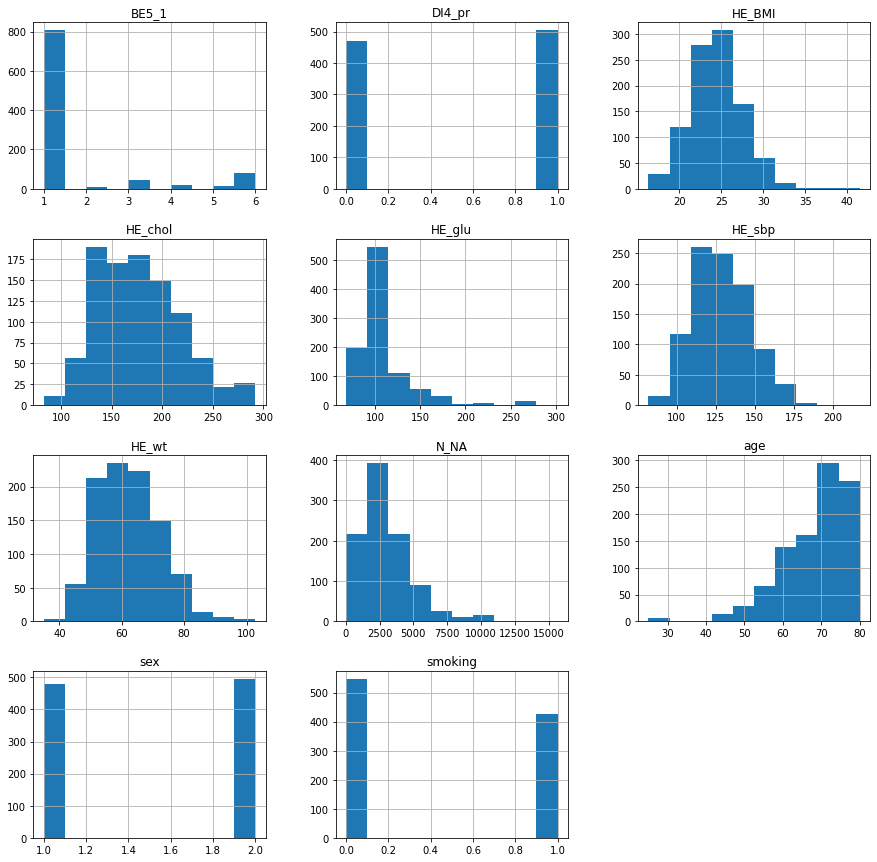

In [15]:
#coulumn별 데이터 시각화
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = d_data3.hist(ax = ax)

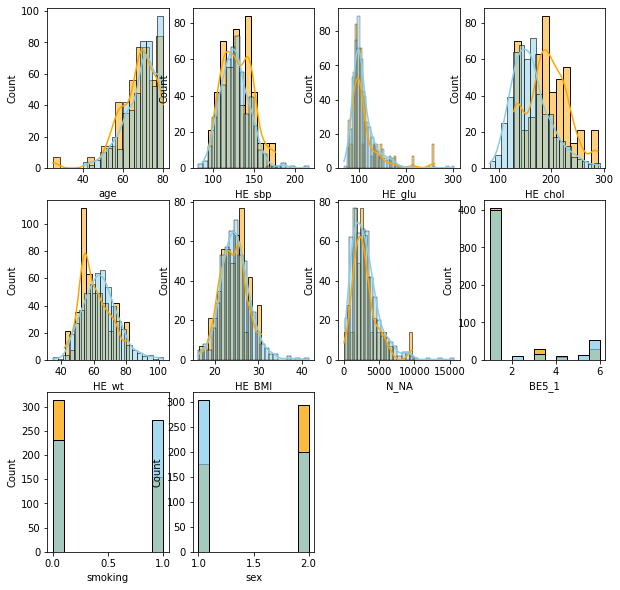

In [16]:
#coulumn별 병에 걸린사람(하늘색)/정상(노랑색)으로 표시하여 데이터 시각화

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(3,4,1)
ax2 = fig.add_subplot(3,4,2)
ax3 = fig.add_subplot(3,4,3)
ax4 = fig.add_subplot(3,4,4)
ax5 = fig.add_subplot(3,4,5)
ax6 = fig.add_subplot(3,4,6)
ax7 = fig.add_subplot(3,4,7)
ax8 = fig.add_subplot(3,4,8)
ax9 = fig.add_subplot(3,4,9)
ax10 = fig.add_subplot(3,4,10)
#나이
no = d_data3.query('DI4_pr == 0')["age"]
yes = d_data3.query('DI4_pr == 1')["age"]
sns.histplot(ax=ax1,x = no, color = 'orange', kde = True)
sns.histplot(ax=ax1,x = yes, color = 'skyblue', kde = True)
#혈압
no = d_data3.query('DI4_pr == 0')["HE_sbp"]
yes = d_data3.query('DI4_pr == 1')["HE_sbp"]
sns.histplot(ax=ax2, x = no, color = 'orange', kde = True)
sns.histplot(ax=ax2, x = yes, color = 'skyblue', kde = True)
#혈당량
no = d_data3.query('DI4_pr == 0')["HE_glu"]
yes = d_data3.query('DI4_pr == 1')["HE_glu"]
sns.histplot(ax=ax3, x = no, color = 'orange', kde = True)
sns.histplot(ax=ax3, x = yes, color = 'skyblue', kde = True)
#콜레스테롤
no = d_data3.query('DI4_pr == 0')["HE_chol"]
yes = d_data3.query('DI4_pr == 1')["HE_chol"]
sns.histplot(ax=ax4, x = no, color = 'orange', kde = True)
sns.histplot(ax=ax4, x = yes, color = 'skyblue', kde = True)
#체중
no = d_data3.query('DI4_pr == 0')["HE_wt"]
yes = d_data3.query('DI4_pr == 1')["HE_wt"]
sns.histplot(ax=ax5, x= no,color = 'orange', kde = True)
sns.histplot(ax=ax5, x = yes,color = 'skyblue', kde = True)
#BMI
no = d_data3.query('DI4_pr == 0')["HE_BMI"]
yes = d_data3.query('DI4_pr == 1')["HE_BMI"]
sns.histplot(ax=ax6, x=no,color = 'orange', kde = True)
sns.histplot(ax=ax6, x=yes,color = 'skyblue', kde = True)
#나트륨섭취량
no = d_data3.query('DI4_pr == 0')["N_NA"]
yes = d_data3.query('DI4_pr == 1')["N_NA"]
sns.histplot(ax=ax7,x = no, color = 'orange', kde = True)
sns.histplot(ax=ax7, x = yes, color = 'skyblue', kde = True)
#일주일간 근력운동 일수 
no = d_data3.query('DI4_pr == 0')["BE5_1"]
yes = d_data3.query('DI4_pr == 1')["BE5_1"]
sns.histplot(ax=ax8, x=no,color = 'orange', kde = False)
sns.histplot(ax=ax8, x=yes,color = 'skyblue', kde = False)
#흡연여부
no = d_data3.query('DI4_pr == 0')["smoking"]
yes = d_data3.query('DI4_pr == 1')["smoking"]
sns.histplot(ax=ax9, x = no, color = 'orange', kde = False)
sns.histplot(ax=ax9, x = yes, color = 'skyblue', kde = False)
# 성별
no = d_data3.query('DI4_pr == 0')["sex"]
yes = d_data3.query('DI4_pr == 1')["sex"]
sns.histplot(ax=ax10,x = no, color = 'orange', kde =False)
sns.histplot(ax=ax10,x = yes, color = 'skyblue', kde = False)

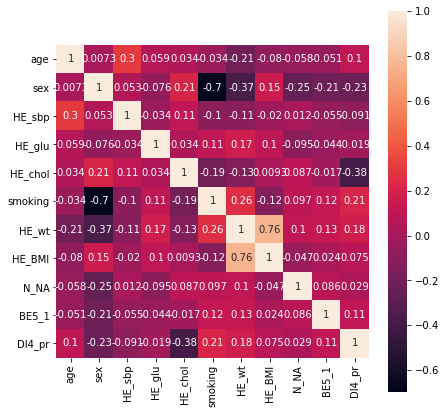

In [17]:
#상관관계 heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(data = d_data3.corr(), square = True, annot = True, cbar=True)
plt.show()

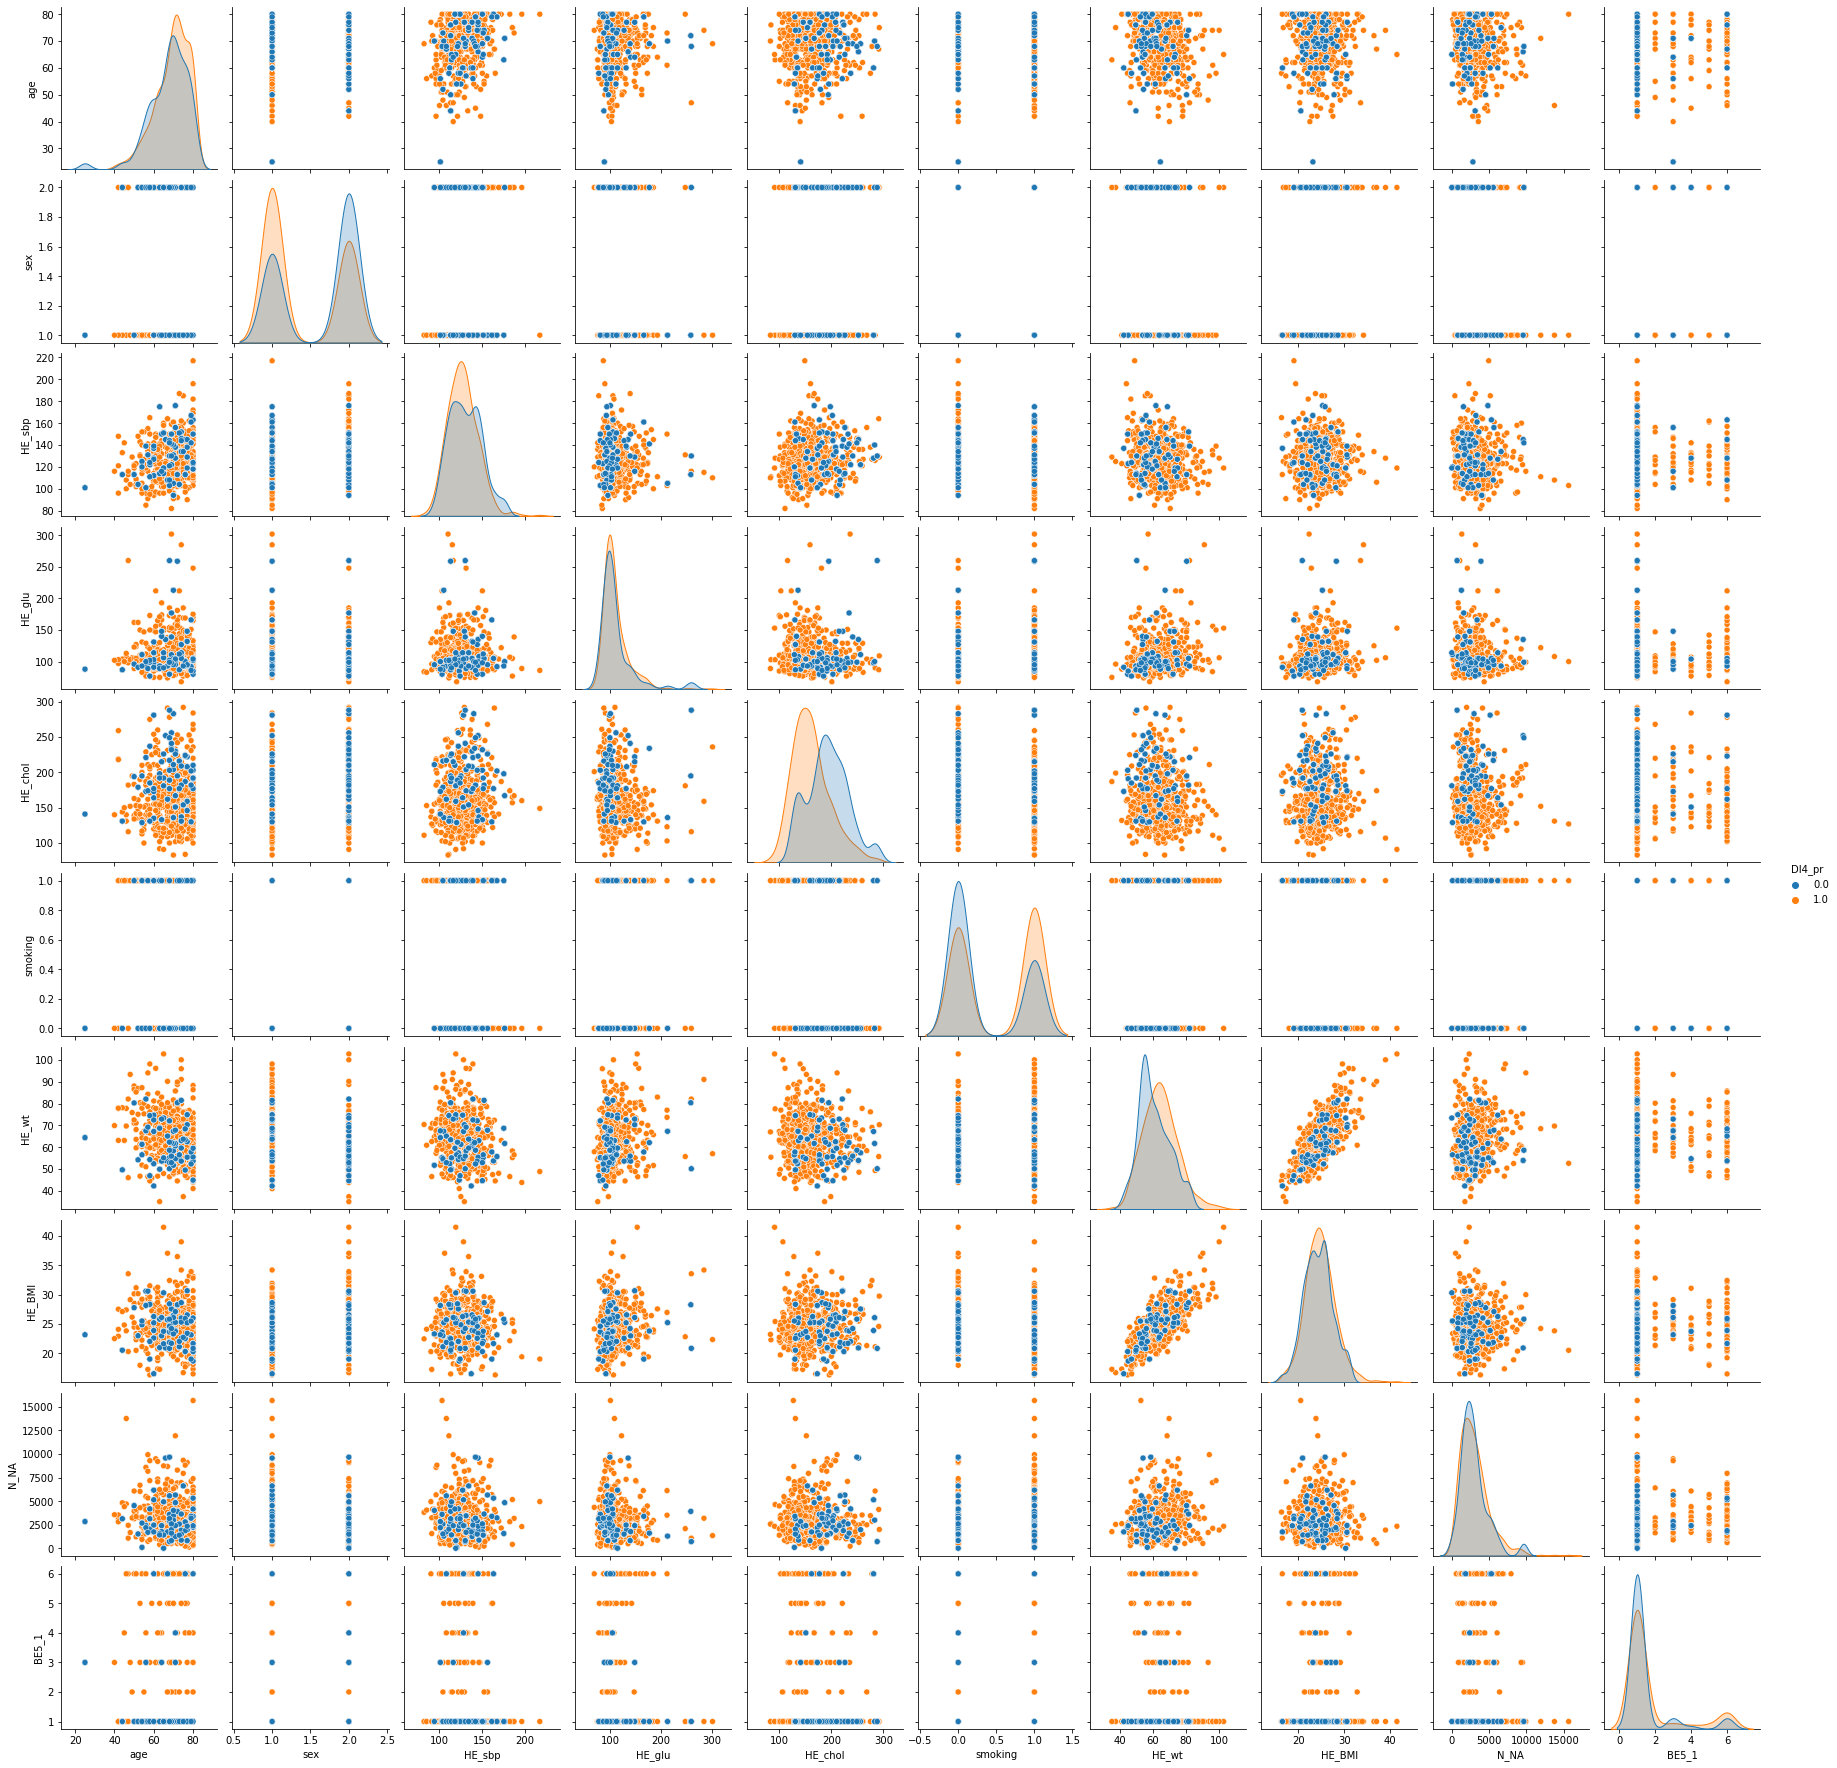

In [18]:
#상관관계 pairplot
sns.pairplot(d_data3, hue = 'DI4_pr', height = 2.5, diag_kind = 'kde')
plt.show()

In [19]:
#독립변수로 예측 모델 만들기 
mod_glm_age = smf.glm(formula = "DI4_pr ~ age", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_sbp = smf.glm(formula = "DI4_pr ~ HE_sbp", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_glu = smf.glm(formula = "DI4_pr ~ HE_glu", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_chol = smf.glm(formula = "DI4_pr ~ HE_chol", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_wt = smf.glm(formula = "DI4_pr ~ HE_wt", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_BMI = smf.glm(formula = "DI4_pr ~ HE_BMI", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_na = smf.glm(formula = "DI4_pr ~ N_NA", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_ex = smf.glm(formula = "DI4_pr ~ BE5_1", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_sm = smf.glm(formula = "DI4_pr ~ smoking", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_sex = smf.glm(formula = "DI4_pr ~ sex", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()

In [20]:
#성능을 평가하기 위해 aic값 비교, 값이 적을수록 더 성능이 좋음
print('mod_glm_age.aic :',mod_glm_age.aic)
print('mod_glm_sbp.aic :',mod_glm_sbp.aic)
print('mod_glm_glu.aic :',mod_glm_glu.aic)
print('mod_glm_chol.aic :',mod_glm_chol.aic)
print('mod_glm_wt.aic :',mod_glm_wt.aic)
print('mod_glm_BMI.aic :',mod_glm_BMI.aic)
print('mod_glm_na.aic :',mod_glm_na.aic)
print('mod_glm_ex.aic :',mod_glm_ex.aic)
print('mod_glm_sm.aic :',mod_glm_sm.aic)
print('mod_glm_sex.aic :',mod_glm_sex.aic)

mod_glm_age.aic : 1340.9020271575437
mod_glm_sbp.aic : 1343.531492999083
mod_glm_glu.aic : 1351.2473052811974
mod_glm_chol.aic : 1196.9882290755559
mod_glm_wt.aic : 1320.3794031072089
mod_glm_BMI.aic : 1346.0373593296938
mod_glm_na.aic : 1350.7984889484078
mod_glm_ex.aic : 1340.37086854814
mod_glm_sm.aic : 1306.282722375078
mod_glm_sex.aic : 1299.694480158752


 mod_glm_chol.aic : 1196.9882290755559\
 mod_glm_sex.aic : 1299.6944801587522\
 mod_glm_sm.aic : 1306.2827223750783\
 mod_glm_wt.aic : 1320.3794031072089\
 mod_glm_ex.aic: 1340.3708685481402\
 mod_glm_age.aic: 1340.9020271575437\
 mod_glm_sbp.aic : 1343.531492999083\
 mod_glm_BMI.aic : 1346.0373593296938\
 mod_glm_na.aic: 1350.7984889484078\
 mod_glm_glu.aic : 1351.2473052811974  순으로 심장병 여부를 잘 예측함

#### 3)분석방법
앞의 결과를 바탕으로 다중회귀모델을 만들고, AIC값, 로그우도, 잔차를 비교하여 성능이 좋은 모델 선정

In [21]:
mod_glm_null = smf.glm(formula = "DI4_pr ~ 1", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_null.aic, mod_glm_null.llf, mod_glm_null.deviance

(1349.605148915416, -673.802574457708, 1347.605148915416)

In [22]:
mod_glm_1 = smf.glm(formula = "DI4_pr ~ HE_chol", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_1.aic,mod_glm_1.llf,mod_glm_1.deviance

(1196.9882290755559, -596.4941145377779, 1192.9882290755559)

In [23]:
mod_glm_2 = smf.glm(formula = "DI4_pr ~ HE_chol + sex", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_2.aic,mod_glm_2.llf,mod_glm_2.deviance

(1172.4644295271012, -583.2322147635506, 1166.4644295271012)

In [24]:
mod_glm_3 = smf.glm(formula = "DI4_pr ~ HE_chol + sex+ smoking", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_3.aic, mod_glm_3.llf,mod_glm_3.deviance

(1171.9209086813441, -581.9604543406721, 1163.9209086813444)

In [25]:
mod_glm_4 = smf.glm(formula = "DI4_pr ~ HE_chol + sex+ smoking +  HE_wt", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_4.aic,mod_glm_4.llf,mod_glm_4.deviance

(1166.3350249422429, -578.1675124711214, 1156.3350249422429)

In [26]:
mod_glm_5 = smf.glm(formula = "DI4_pr ~HE_chol + sex+ smoking +  HE_wt + BE5_1", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_5.aic,mod_glm_5.llf,mod_glm_5.deviance

(1162.9316762952797, -575.4658381476398, 1150.9316762952797)

In [27]:
mod_glm_6 = smf.glm(formula = "DI4_pr ~ HE_chol + sex+ smoking +  HE_wt + BE5_1 + age", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_6.aic,mod_glm_6.llf,mod_glm_6.deviance

(1140.1142197316183, -563.0571098658091, 1126.1142197316185)

In [28]:
mod_glm_7 = smf.glm(formula = "DI4_pr ~ HE_chol + sex+ smoking +  HE_wt + BE5_1 + age + HE_sbp", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_7.aic,mod_glm_7.llf,mod_glm_7.deviance

(1135.0151211066493, -559.5075605533247, 1119.015121106649)

In [29]:
mod_glm_8 = smf.glm(formula = "DI4_pr ~ HE_chol + sex+ smoking +  HE_wt + BE5_1 +  age + HE_sbp + HE_BMI ", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_8.aic,mod_glm_8.llf,mod_glm_8.deviance

(1134.9381778232203, -558.4690889116101, 1116.9381778232203)

In [30]:
mod_glm_9 = smf.glm(formula = "DI4_pr ~ HE_chol + sex+ smoking + HE_wt + BE5_1 +  age + HE_sbp + HE_BMI + N_NA", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_9.aic,mod_glm_9.llf,mod_glm_9.deviance

(1135.2741684345274, -557.6370842172637, 1115.2741684345276)

In [31]:
mod_glm_10 = smf.glm(formula = "DI4_pr ~ HE_chol + sex+ smoking +  HE_wt + BE5_1 +  age + HE_sbp + HE_BMI + N_NA + HE_glu", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_10.aic,mod_glm_10.llf,mod_glm_10.deviance

(1132.970905035804, -555.485452517902, 1110.9709050358038)

In [32]:
#mod_glm_10, mod_glm_9, mod_glm_8, mod_glm_7 의 aic 값이 비슷하므로, p-value를 비교

In [33]:
mod_glm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 DI4_pr   No. Observations:                  973
Model:                            GLM   Df Residuals:                      962
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -555.49
Date:                Thu, 10 Jun 2021   Deviance:                       1111.0
Time:                        16:36:26   Pearson chi2:                     977.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5857      1.134      0.516      0.606      -1.638       2.809
HE_chol       -0.0218      0.002    -10.241      0.000      -0.026      -0.018
sex           -0.4061      0.277     -1.466      0.143      -0.949       0.137
smoking        0.3792      0.206      1.845      0.065      -0.024       0.782
HE_wt          0.0104      0.018      0.574      0.566      -0.025       0.046
BE5_1          0.1144      0.052      2.208      0.027       0.013       0.216
age            0.0460      0.009      5.248      0.000       0.029       0.063
HE_sbp        -0.0118      0.004     -2.861      0.004      -0.020      -0.004
HE_BMI         0.0725      0.052      1.385      0.166      -0.030       0.175
N_NA        4.526e-05   4.22e-05      1.074      0.283   -3.74e-05       0.000
HE_glu        -0.0054      0.003     -2.068      0.039      -0.011      -0.000
==============================================================================
"""

In [34]:
mod_glm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 DI4_pr   No. Observations:                  973
Model:                            GLM   Df Residuals:                      963
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -557.64
Date:                Thu, 10 Jun 2021   Deviance:                       1115.3
Time:                        16:36:26   Pearson chi2:                     983.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2986      1.127      0.265      0.791      -1.910       2.507
HE_chol       -0.0217      0.002    -10.296      0.000      -0.026      -0.018
sex           -0.4151      0.277     -1.499      0.134      -0.958       0.128
smoking        0.3744      0.206      1.820      0.069      -0.029       0.778
HE_wt          0.0042      0.018      0.238      0.812      -0.031       0.039
BE5_1          0.1220      0.052      2.361      0.018       0.021       0.223
age            0.0434      0.009      5.013      0.000       0.026       0.060
HE_sbp        -0.0114      0.004     -2.752      0.006      -0.019      -0.003
HE_BMI         0.0789      0.052      1.515      0.130      -0.023       0.181
N_NA        5.363e-05   4.17e-05      1.286      0.198   -2.81e-05       0.000
==============================================================================
"""

In [35]:
mod_glm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 DI4_pr   No. Observations:                  973
Model:                            GLM   Df Residuals:                      964
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -558.47
Date:                Thu, 10 Jun 2021   Deviance:                       1116.9
Time:                        16:36:26   Pearson chi2:                     980.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5075      1.112      0.456      0.648      -1.673       2.688
HE_chol       -0.0213      0.002    -10.242      0.000      -0.025      -0.017
sex           -0.4671      0.274     -1.703      0.089      -1.005       0.071
smoking        0.3528      0.205      1.720      0.085      -0.049       0.755
HE_wt          0.0057      0.018      0.321      0.748      -0.029       0.041
BE5_1          0.1227      0.052      2.380      0.017       0.022       0.224
age            0.0428      0.009      4.963      0.000       0.026       0.060
HE_sbp        -0.0112      0.004     -2.715      0.007      -0.019      -0.003
HE_BMI         0.0748      0.052      1.440      0.150      -0.027       0.177
==============================================================================
"""

In [36]:
mod_glm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 DI4_pr   No. Observations:                  973
Model:                            GLM   Df Residuals:                      965
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -559.51
Date:                Thu, 10 Jun 2021   Deviance:                       1119.0
Time:                        16:36:26   Pearson chi2:                     984.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2589      1.098      0.236      0.814      -1.894       2.412
HE_chol       -0.0210      0.002    -10.210      0.000      -0.025      -0.017
sex           -0.2185      0.213     -1.028      0.304      -0.635       0.198
smoking        0.3562      0.205      1.739      0.082      -0.045       0.758
HE_wt          0.0286      0.008      3.530      0.000       0.013       0.044
BE5_1          0.1251      0.052      2.425      0.015       0.024       0.226
age            0.0456      0.008      5.429      0.000       0.029       0.062
HE_sbp        -0.0109      0.004     -2.650      0.008      -0.019      -0.003
==============================================================================
"""

In [37]:
#mod_glm_7에서 p-value가 높은 요인들을 제거하여 mod_glm_11 제작
mod_glm_11 = smf.glm(formula = "DI4_pr ~ HE_chol +  HE_wt + BE5_1 + age + HE_sbp", 
                  data = d_data3, 
                  family=sm.families.Binomial()).fit()
mod_glm_11.aic,mod_glm_11.llf,mod_glm_11.deviance

(1142.8588742799677, -565.4294371399839, 1130.8588742799677)

In [38]:
mod_glm_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 DI4_pr   No. Observations:                  973
Model:                            GLM   Df Residuals:                      967
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -565.43
Date:                Thu, 10 Jun 2021   Deviance:                       1130.9
Time:                        16:36:26   Pearson chi2:                     989.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3132      0.917     -0.342      0.733      -2.110       1.484
HE_chol       -0.0219      0.002    -10.757      0.000      -0.026      -0.018
HE_wt          0.0368      0.008      4.851      0.000       0.022       0.052
BE5_1          0.1437      0.051      2.832      0.005       0.044       0.243
age            0.0471      0.008      5.660      0.000       0.031       0.063
HE_sbp        -0.0116      0.004     -2.826      0.005      -0.020      -0.004
==============================================================================
"""

###  모든 요인이 p-value가 0.05보다 이하인 값인 mod_glm_11 선정

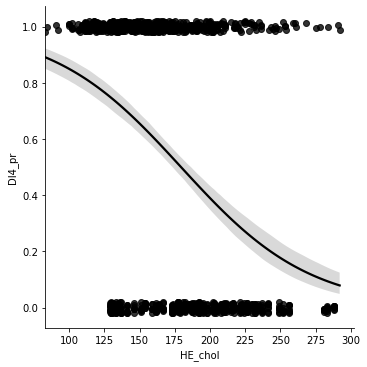

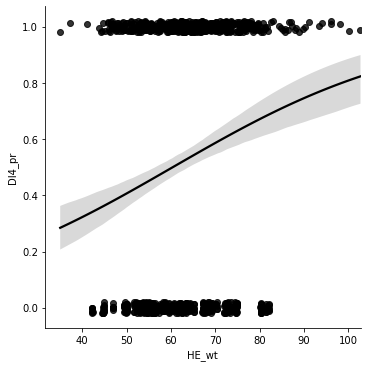

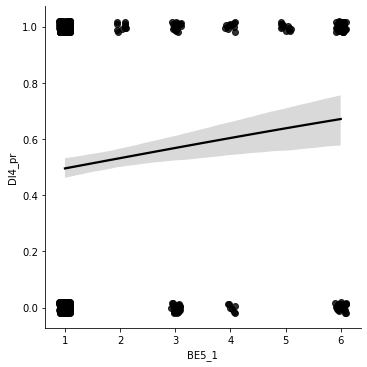

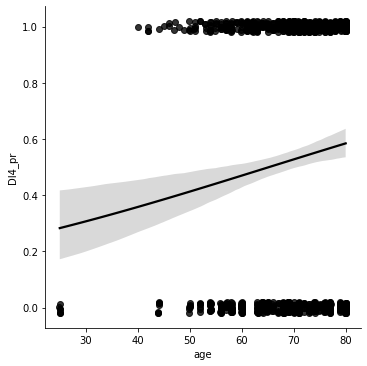

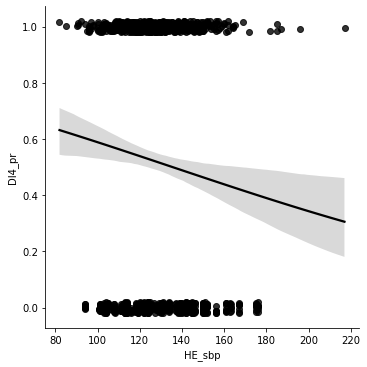

In [39]:
#단일 변수별 로지스틱 회귀 그래프 그리기 
sns.lmplot(x = "HE_chol", y = "DI4_pr",
           data = d_data3, 
           logistic = True,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"},
           x_jitter = 0.01, y_jitter = 0.02)
sns.lmplot(x = "HE_wt", y = "DI4_pr",
           data = d_data3, 
           logistic = True,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.02)
sns.lmplot(x = "BE5_1", y = "DI4_pr",
           data = d_data3, 
           logistic = True,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.02)
sns.lmplot(x = "age", y = "DI4_pr",
           data = d_data3, 
           logistic = True,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.02)
sns.lmplot(x = "HE_sbp", y = "DI4_pr",
           data = d_data3, 
           logistic = True,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.02)

### 변수별 심장질환 발병빈도 barplot - 성능이 좋은 단일변수 순으로
콜레스테롤, 나이, 몸무게, 수축기 혈압은 단일변수의 분포를 describe()를 통해 파악한 후 구간을 나누었음.(min, 25%, 50%, 75%,max)

In [40]:
#콜레스테롤
condition_list1 = [(d_data3.HE_chol>= 83) & (d_data3.HE_chol < 144),
                 (d_data3.HE_chol >= 144) & (d_data3.HE_chol < 174),
                 (d_data3.HE_chol>= 174) & (d_data3.HE_chol< 203),
                 (d_data3.HE_chol >= 203)]
choice_list1 = ['83~143', '144~173', '174~202', '203~292']
d_data3['chol_level'] = np.select(condition_list1, choice_list1, default = 'NaN')

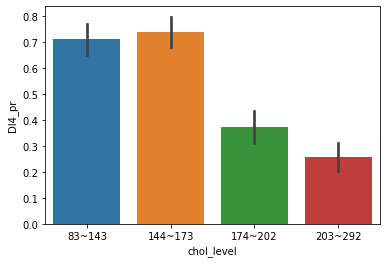

In [42]:
sns.barplot(x = 'chol_level', y = 'DI4_pr', data = d_data3, order = choice_list1)

In [43]:
#몸무게
condition_list2 = [(d_data3.HE_wt>= 35) & (d_data3.HE_wt < 55),
                 (d_data3.HE_wt >= 55) & (d_data3.HE_wt < 62),
                 (d_data3.HE_wt>= 62) & (d_data3.HE_wt< 69),
                 (d_data3.HE_wt >= 69)]
choice_list2 = ['35~54','55~61','62~68','69~103']
d_data3['wt_level'] = np.select(condition_list2, choice_list2, default = 'NaN')

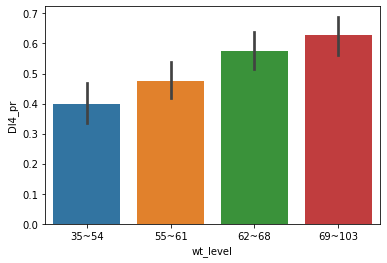

In [44]:
sns.barplot(x = 'wt_level', y = 'DI4_pr', data = d_data3, order = choice_list2)

# 몸무게가 많이 나갈수록 심장질환 발병률이 높다. 

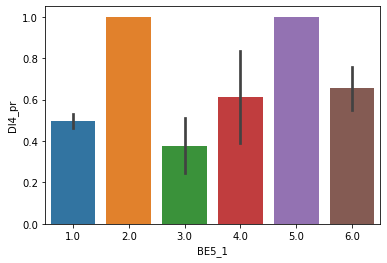

In [45]:
#일주일 동안 근력운동횟수
sns.barplot(x = 'BE5_1', y = 'DI4_pr', data = d_data3)

#데이터의 90%이상이 일주일에 운동을 한번도 하지 않음(1)에 포함되었으므로 정확한 결과를 얻기 힘들다. 

In [46]:
#나이
condition_list3 = [(d_data3.age >= 25) & (d_data3.age < 50),
                 (d_data3.age >= 50) & (d_data3.age < 55),
                 (d_data3.age >= 55) & (d_data3.age < 60),
                 (d_data3.age >= 60) & (d_data3.age < 65),
                 (d_data3.age >= 65) & (d_data3.age < 70),
                 (d_data3.age >= 70) & (d_data3.age < 75),
                 (d_data3.age >= 75)]
choice_list3 = ['25 ~ 49', '50~54', '55~59', '60~64', '65~69','70~74','75~80']
d_data3['age_level'] = np.select(condition_list3, choice_list3, default = 'NaN')

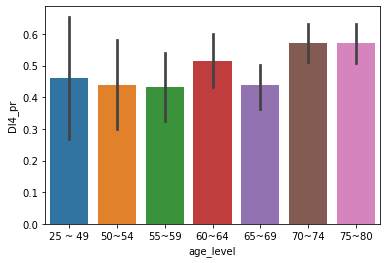

In [47]:
sns.barplot(x = 'age_level', y = 'DI4_pr', data = d_data3, order = choice_list3)

#나이는 뚜렷한 차이가 보이지 않는다. 나이 분포의 25%가 64세인것을 감안하면, 젊은 나이에도 심장질환의 발병률이 높다. 

In [48]:
#수축기 혈압
condition_list4 = [(d_data3.HE_sbp >= 82) & (d_data3.HE_sbp < 114),
                 (d_data3.HE_sbp>= 114) & (d_data3.HE_sbp < 128),
                 (d_data3.HE_sbp >= 128) & (d_data3.HE_sbp < 141),
                 (d_data3.HE_sbp >= 141)]
choice_list4 = ['82~113', '114~127', '128~140', '141~217']
d_data3['sbp_level'] = np.select(condition_list4, choice_list4, default = 'NaN')

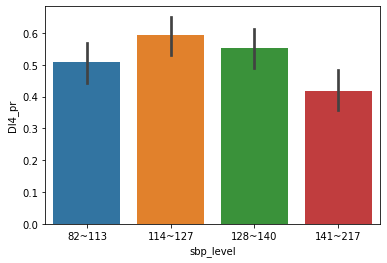

In [49]:
sns.barplot(x = 'sbp_level', y = 'DI4_pr', data = d_data3, order=choice_list4)
#정상 수축기 혈압 범위는 120~130이다. 그걸 감안하면 고혈압인 사람도 많고, 심장질환 발병률도 높다. 

In [50]:
# 영향을 줄 것 같았던 요인들의 분포 - 하지만 모델에 포함 안됨...

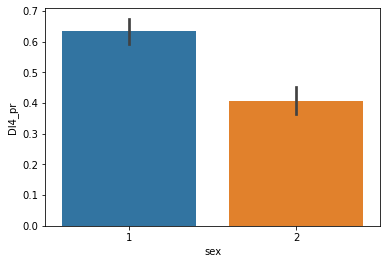

In [51]:
#성별
sns.barplot(x = 'sex', y = 'DI4_pr', data = d_data3)

#남자가 여자보다 발병률이 높다. 

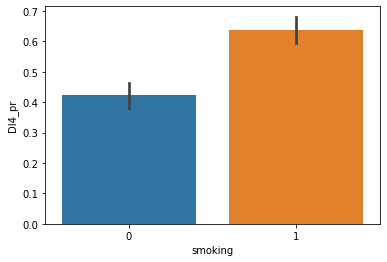

In [52]:
#흡연여부 
sns.barplot(x = 'smoking', y = 'DI4_pr', data = d_data3)

#흡연자가 심장질환 발병률이 더 높다. 

### 4)예측모델 성능평가

##### 4-1) 성능이 가장 좋은모델(mod_glm_11)을 사용하여 관측값과 예측값 비교

In [53]:
#예측값이 0.5 이상인 경우를 1(심장질환), 아닌경우를 0(정상)으로 열 추가
d_data3['pred'] = mod_glm_11.predict()
d_data3['predict'] = np.where(d_data3['pred']>= 0.5, 1, 0)
d_data3

,age,sex,HE_sbp,HE_glu,HE_chol,smoking,HE_wt,HE_BMI,N_NA,BE5_1,DI4_pr,chol_level,wt_level,age_level,sbp_level,pred,predict
13,57,1,116.0,99.0,211.0,1,94.1,30.002158,9921.098795,1.0,1.0,203~292,69~103,55~59,114~127,0.501324,1
45,74,2,126.0,96.0,145.0,0,63.0,24.826128,4017.041461,1.0,1.0,144~173,62~68,70~74,114~127,0.729687,1
64,56,2,124.0,106.0,140.0,0,57.6,20.481245,5497.114372,1.0,1.0,83~143,55~61,55~59,114~127,0.520014,1
70,74,1,122.0,142.0,123.0,1,57.4,21.237738,854.513004,5.0,1.0,83~143,55~61,70~74,114~127,0.868835,1
141,57,1,141.0,92.0,153.0,1,67.4,24.138318,5343.076750,1.0,1.0,144~173,62~68,55~59,141~217,0.501525,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,69,2,150.0,98.0,232.0,0,52.9,21.709502,2602.255799,1.0,0.0,203~292,35~54,65~69,141~217,0.141750,0
6468,60,1,139.0,131.0,177.0,1,72.5,25.204977,2476.318717,1.0,0.0,174~202,69~103,60~64,128~140,0.457963,0
6522,68,2,142.0,99.0,249.0,0,58.6,25.837332,9659.199056,1.0,0.0,203~292,55~61,65~69,141~217,0.128016,0
6526,75,1,134.0,93.0,154.0,0,63.7,22.731523,6616.930493,1.0,0.0,144~173,62~68,75~80,128~140,0.684786,1


In [54]:
#예측이 틀린 행 추출
d_data3[d_data3.predict != d_data3.DI4_pr]

,age,sex,HE_sbp,HE_glu,HE_chol,smoking,HE_wt,HE_BMI,N_NA,BE5_1,DI4_pr,chol_level,wt_level,age_level,sbp_level,pred,predict
238,70,2,144.0,98.0,196.0,0,55.4,23.059313,2169.726026,1.0,1.0,174~202,55~61,70~74,141~217,0.309528,0
328,74,2,146.0,108.0,137.0,0,63.0,26.020843,885.231652,1.0,0.0,83~143,62~68,70~74,141~217,0.718566,1
397,70,1,105.0,213.0,136.0,0,67.3,25.237289,1306.808817,1.0,0.0,83~143,62~68,70~74,82~113,0.802730,1
450,78,2,146.0,88.0,252.0,0,53.4,25.503759,2304.630040,1.0,1.0,203~292,35~54,75~80,141~217,0.147846,0
1232,77,2,147.0,105.0,191.0,0,61.0,27.811199,9089.195189,1.0,1.0,174~202,55~61,75~80,141~217,0.452213,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,56,2,101.0,100.0,173.0,0,67.5,28.168379,2202.256979,3.0,0.0,144~173,62~68,55~59,82~113,0.567999,1
1575,77,1,119.0,95.0,159.0,1,74.9,25.200392,828.552000,1.0,0.0,144~173,69~103,75~80,114~127,0.793476,1
3401,71,2,128.0,104.0,151.0,0,54.7,23.737981,2415.978308,4.0,0.0,144~173,35~54,70~74,128~140,0.694785,1
3898,74,2,144.0,127.0,131.0,0,53.6,22.571453,1517.856036,1.0,0.0,83~143,35~54,70~74,141~217,0.678325,1


In [55]:
d_data3['predict_bool'] = np.where(d_data3['DI4_pr'] == d_data3['predict'], True, False)
d_data3['predict_bool'].mean()

0.7142857142857143

In [56]:
#예측 71%정도

### test 데이터 만들어서 미리 만든 모델로 예측

In [57]:
#2011~2014년의 국민건강영양조사 데이터 사용
test = pd.concat([data5,data6,data7,data8])

In [58]:
t_test= test[(test['DI4_pr'] == 0) | (test['DI4_pr'] == 1)]
t_test['smoking'] = [1 if (b == 1)|(b == 2) else 0 for b in t_test['BS1_1']]

<ipython-input-58-f520b8753a0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_test['smoking'] = [1 if (b == 1)|(b == 2) else 0 for b in t_test['BS1_1']]


In [59]:
t_test2 = t_test.drop(t_test[(t_test['BE5_1'] == 8) | (t_test['BE5_1'] == 9)].index)

In [60]:
t_test2_1 = t_test2.loc[:,['age','sex','HE_sbp','HE_glu','HE_chol','smoking','HE_wt','HE_BMI','N_NA','BE5_1','DI4_pr']]

In [61]:
t_test3 = t_test2_1.dropna()

In [62]:
# 병에 걸린 사람, 정상인 사람의 비율을 1:1로 맞추기 위한 코드 
t_test3_p = t_test3[t_test3['DI4_pr'] == 0] 
t_test3_n = t_test3[t_test3['DI4_pr'] == 1]

In [63]:
t_test3 = pd.concat([t_test3 , t_test3_p, t_test3_p, t_test3_p, t_test3_n])
t_test3

,age,sex,HE_sbp,HE_glu,HE_chol,smoking,HE_wt,HE_BMI,N_NA,BE5_1,DI4_pr
35,55,1,118.0,115.0,164.0,1,75.7,23.157892,11514.650699,1.0,1.0
57,75,2,100.0,110.0,125.0,0,55.0,25.766905,982.412736,1.0,1.0
80,57,1,120.0,108.0,179.0,1,89.4,28.893878,8242.321885,1.0,1.0
272,77,1,130.0,90.0,173.0,0,56.0,22.178912,5846.343354,2.0,0.0
501,61,2,108.0,93.0,225.0,0,55.7,23.981992,10185.083019,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7113,74,2,123.0,326.0,167.0,0,58.3,25.773469,3152.402559,1.0,1.0
7176,73,2,148.0,100.0,146.0,0,57.9,25.461025,1081.702402,1.0,1.0
7241,76,2,121.0,99.0,223.0,0,54.9,23.887678,2056.095616,1.0,1.0
7441,63,1,129.0,88.0,133.0,1,56.0,21.311892,5096.896380,1.0,1.0


In [64]:
t_test3 = t_test3[:973] #본 데이터의 길이를 맞추기 위해 slice

In [65]:
t_test3

,age,sex,HE_sbp,HE_glu,HE_chol,smoking,HE_wt,HE_BMI,N_NA,BE5_1,DI4_pr
35,55,1,118.0,115.0,164.0,1,75.7,23.157892,11514.650699,1.0,1.0
57,75,2,100.0,110.0,125.0,0,55.0,25.766905,982.412736,1.0,1.0
80,57,1,120.0,108.0,179.0,1,89.4,28.893878,8242.321885,1.0,1.0
272,77,1,130.0,90.0,173.0,0,56.0,22.178912,5846.343354,2.0,0.0
501,61,2,108.0,93.0,225.0,0,55.7,23.981992,10185.083019,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7037,53,2,111.0,165.0,133.0,0,74.5,28.247774,3350.704682,1.0,1.0
7055,64,1,148.0,114.0,155.0,1,57.2,21.903490,3902.361178,1.0,1.0
7117,66,2,142.0,86.0,138.0,0,57.6,25.195263,2873.851429,1.0,1.0
7123,72,2,120.0,89.0,216.0,0,51.6,22.392684,3719.761687,1.0,1.0


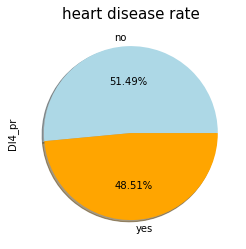

In [66]:
plt.figure(figsize = (4,4))
plt.title('heart disease rate', fontsize = 15 )
t_test3['DI4_pr'].value_counts().plot.pie(autopct = '%1.2f%%',
                                         labels = ['no','yes'],
                                         colors = ['lightblue','orange'],shadow = True)

In [67]:
# 예측
t_test3['pred'] = mod_glm_11.predict()
t_test3['predict'] = np.where(t_test3['pred']>= 0.5, 1, 0)

<ipython-input-67-95af4bb6ef08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_test3['pred'] = mod_glm_11.predict()
<ipython-input-67-95af4bb6ef08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_test3['predict'] = np.where(t_test3['pred']>= 0.5, 1, 0)


In [68]:
t_test3[t_test3.predict != t_test3.DI4_pr]

,age,sex,HE_sbp,HE_glu,HE_chol,smoking,HE_wt,HE_BMI,N_NA,BE5_1,DI4_pr,pred,predict
272,77,1,130.0,90.0,173.0,0,56.0,22.178912,5846.343354,2.0,0.0,0.868835,1
501,61,2,108.0,93.0,225.0,0,55.7,23.981992,10185.083019,1.0,0.0,0.501525,1
633,80,2,130.0,149.0,205.0,1,61.2,27.382244,1857.744024,1.0,0.0,0.813117,1
815,59,1,176.0,96.0,124.0,1,78.1,26.460906,12442.718521,6.0,1.0,0.147846,0
864,69,1,103.0,101.0,138.0,1,67.9,23.248003,3970.376004,1.0,0.0,0.537808,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,73,1,107.0,72.0,101.0,1,65.5,25.553985,1801.436965,1.0,1.0,0.429318,0
7037,53,2,111.0,165.0,133.0,0,74.5,28.247774,3350.704682,1.0,1.0,0.141750,0
7055,64,1,148.0,114.0,155.0,1,57.2,21.903490,3902.361178,1.0,1.0,0.457963,0
7117,66,2,142.0,86.0,138.0,0,57.6,25.195263,2873.851429,1.0,1.0,0.128016,0


In [69]:
t_test3['predict_bool'] = np.where(t_test3['DI4_pr'] == t_test3['predict'], True, False)
t_test3['predict_bool'].mean()

<ipython-input-69-e64eea3450e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_test3['predict_bool'] = np.where(t_test3['DI4_pr'] == t_test3['predict'], True, False)


0.5960945529290853

In [70]:
#약 60%

##### 4-2) 예측값 vs 관측값 

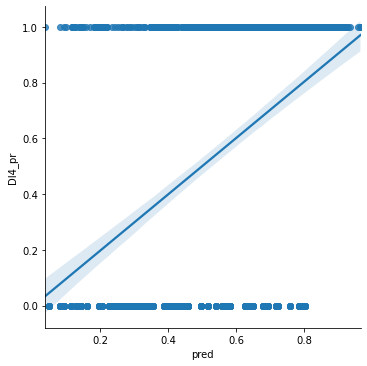

In [71]:
#분류모델이라 0,1으로 치우침
sns.lmplot(x = 'pred', y = 'DI4_pr', data = d_data3) #본 data 

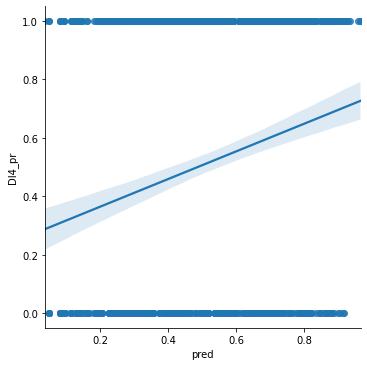

In [72]:
sns.lmplot(x = 'pred', y = 'DI4_pr', data = t_test3) #test 데이터 

##### 4-3) 콜레스테롤이 얼마 이하이면 심장질환에 걸릴 위험이 낮은지 알려주는 코드

In [73]:
mod_glm_11.params

Intercept   -0.313156
HE_chol     -0.021946
HE_wt        0.036816
BE5_1        0.143694
age          0.047055
HE_sbp      -0.011562
dtype: float64

In [74]:
a = float(input('몸무게: '))
b = float(input('일주일 동안의 운동횟수 (0회-1, 1회-2, 2회-3, 3회-4, 4회-5, 5회이상-6): ' ))
c = float(input('나이: '))
d = float(input('수축기 혈압: '))

몸무게: 62
일주일 동안의 운동횟수 (0회-1, 1회-2, 2회-3, 3회-4, 4회-5, 5회이상-6): 1
나이: 70
수축기 혈압: 128


In [75]:
beta0 = mod_glm_11.params[0]
beta1 = mod_glm_11.params[1]
beta2 = mod_glm_11.params[2]
beta3 = mod_glm_11.params[3]
beta4 = mod_glm_11.params[4]
beta5 = mod_glm_11.params[5]


chol = ( 0 - beta0 - beta2 * a - beta3 * b -beta4 * c - beta5 * d ) / beta1
print("심장질환을 예방하기 위해 귀하의 콜레스테롤 수치를 " + str(chol.round(2)) + " ㎎/㎗ 이하로 낮추는 것을 권장합니다.")

심장질환을 예방하기 위해 귀하의 콜레스테롤 수치를 178.94 ㎎/㎗ 이하로 낮추는 것을 권장합니다.
